# Linear Regression

## Overview
A supervised learning algorithm to predict a continuous numeric value by modeling the linear relationship between one or more input features and an output variable.

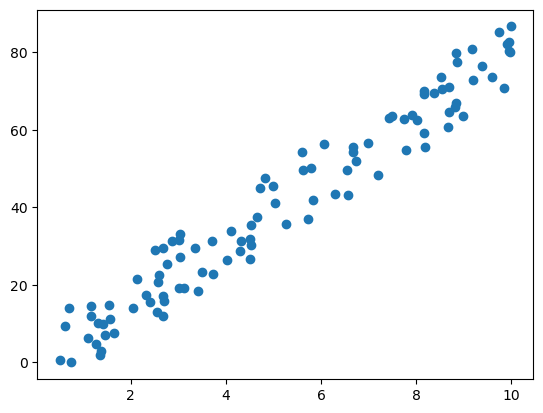

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

df = pd.read_csv('scores.csv')
df = df.rename(columns={'study_time': 'x', 'score': 'y'}) # just to make it generic
plt.scatter(df.x, df.y)
plt.show()

## Cost Function
A function that measures how wrong the model’s predictions are by calculating the error between predicted values and actual values.
The goal of training is to minimize this cost.

### Mean Squared Error
The most common cost function used, denoted as:

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
where n is the size of the dataset.
</div>


$$
\hat{y}_i = mx_i+b
$$


<div style="text-align: center; font-style: italic; font-size: 90%;">
and the parameter vector is
</div>

$$
\theta =
\begin{bmatrix}
b \\
m
\end{bmatrix}
$$




### Code implementation

In [24]:
def mean_squared_error(m, b, points):
    total_error = 0
    n = len(points)
    for i in range(n):
        y = points.iloc[i].y
        x = points.iloc[i].x

        total_error += (y - (m * x + b)) ** 2

    return (1/n) * total_error

In [25]:
m = 0
b = 0
mean_squared_error(m,b,df)


np.float64(2292.3048000000003)

## Gradient Descent
An iterative optimization algorithm used to minimize a loss function in machine learning by updating model parameters (weights and biases) in the direction of the steepest descent. We want to adjust m and b to make J(m, b) as small as possible:

<div style="text-align: center; font-style: italic; font-size: 90%;">
Partial derivative with respect to m
</div>

$$
\frac{\partial J(\theta)}{\partial m} = \frac{1}{n} \sum_{i=1}^n2(y_i - \hat{y}_i)(-x_i)
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
or to simplify
</div>

$$
\frac{\partial J(\theta)}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n}x_i(y_i - \hat{y}_i)
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
Partial derivative with respect to b
</div>

$$
\frac{\partial J(\theta)}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n}(y_i - (\hat{y}_i)
$$

### Code Implementation

In [30]:
def gradient_descent(m, b, points, alpha):
    n = len(points)
    partial_m = 0
    partial_b = 0

    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        partial_m += -(2/n) * x * (y - (m * x + b))
        partial_b += -(2/n) * (y - (m * x + b))

    m = m - alpha * partial_m
    b = b - alpha * partial_b

    return m, b

In [74]:
epochs = 2000
alpha = 0.001

for epoch in range(epochs):
    m, b = gradient_descent(m, b, df, alpha)

print(m,b)

mean_squared_error(m, b, df)

8.056496715311463 -0.7204522584745108


np.float64(30.286654553213204)

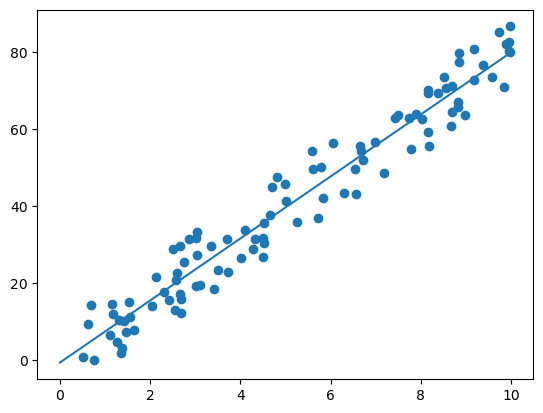

In [75]:
plt.scatter(df.x, df.y)
plt.plot(list(range(0, 11)), [m * x + b for x in range(0, 11)])
plt.show()

## Comparison with Scikit-Learn

DIY Gradient Descent:
m = 8.056496715311463
b = -0.7204522584745108
MSE = 30.286654553213204

Scikit-Learn LinearRegression:
m = 8.132712614491972
b = -1.2398972156538903
MSE = 30.22186842047816


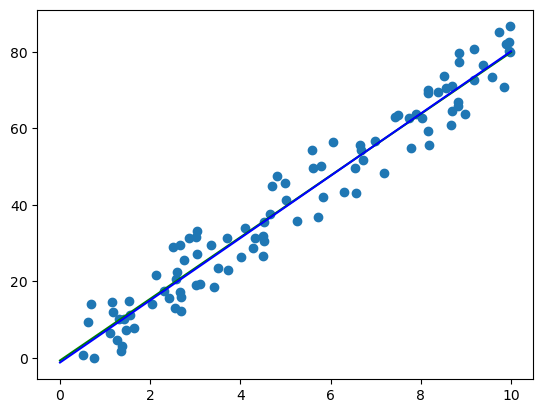

In [76]:
model = LinearRegression()

X = df[['x']]  
y = df['y']

model.fit(X, y)

m_sklearn = model.coef_[0]    
b_sklearn = model.intercept_  

print("DIY Gradient Descent:")
print("m =", m)
print("b =", b)
print("MSE =", mean_squared_error(m, b, df))

print("\nScikit-Learn LinearRegression:")
print("m =", m_sklearn)
print("b =", b_sklearn)
print("MSE =", mse_sklearn)

plt.scatter(df.x, df.y)
plt.plot(list(range(0, 11)), [m * x + b for x in range(0, 11)], color='green', label='DIY')
plt.plot(list(range(0, 11)), [m_sklearn * x + b_sklearn for x in range(0, 11)], color='blue', label='Sklearn')

plt.show()